<a href="https://colab.research.google.com/github/jcallaghan2020/Human-Genome-Analysis/blob/main/1st_file_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports:

In [ ]:
import numpy as np
from numpy import where
import pandas as pd
import statistics as stat
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
from __future__ import division
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline


# import scikit-allel
!pip install scikit-allel
import allel
# check which version is installed
print(allel.__version__)


import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


test_sample = allel.read_vcf('/content/drive/MyDrive/test_sample (1).vcf')
gt_test = allel.GenotypeArray(test_sample['calldata/GT'])
het_count = gt_test.count_het()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 10.5 MB/s 
1.3.5
Mounted at /content/drive


In [ ]:
len(gt_test) / 10

1627.2

In [ ]:
#trying to do mean
def mean_visual(file_arr):
  global mean_lst
  mean_lst = []
  f_het_rate_lst = []
  count = 0
  hom_rate = 0
  het_rate = 0
  hom_rate2 = 0
  het_rate2 = 0

  #calc mean rate for individual sections
  #het = different allele values (1/0 or 0/1), hom = same allele values (0/0 or 1/1)
  for i in file_arr[0:]:
    i_lst = i.tolist()
    for n in i_lst:
      if n == [0, 0] or n == [1, 1]:
        count = count + 1
        hom_rate = hom_rate + 1
      if n == [1, 0] or n == [0, 1]:
        count = count + 1
        het_rate = het_rate + 1
      if count == int((len(file_arr) / 10)):    #divide into sections of x samples (size might need to change)
        f_het_rate = het_rate / (het_rate + hom_rate) #calculate ratio of heterozygous alleles
        f_het_rate_lst.append(f_het_rate) #add ratio to list
        hom_rate = 0
        het_rate = 0
        f_het_rate = 0
        count = 0
        mean = stat.mean(f_het_rate_lst)
        mean_lst.append(mean)
        f_het_rate_lst = []
        mean = 0
      #calc mean rate for all data
  n_het_rate = stat.mean(mean_lst)

  x = range(len(mean_lst))
  line = 0
  line = [line for i in x]
  plt.plot(x, mean_lst)
  plt.plot(x, line)
  plt.axhline(y=n_het_rate, color='r', linestyle='-')
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  plt.title('mean')
  plt.ylim(0, 0.4)
  plt.show()



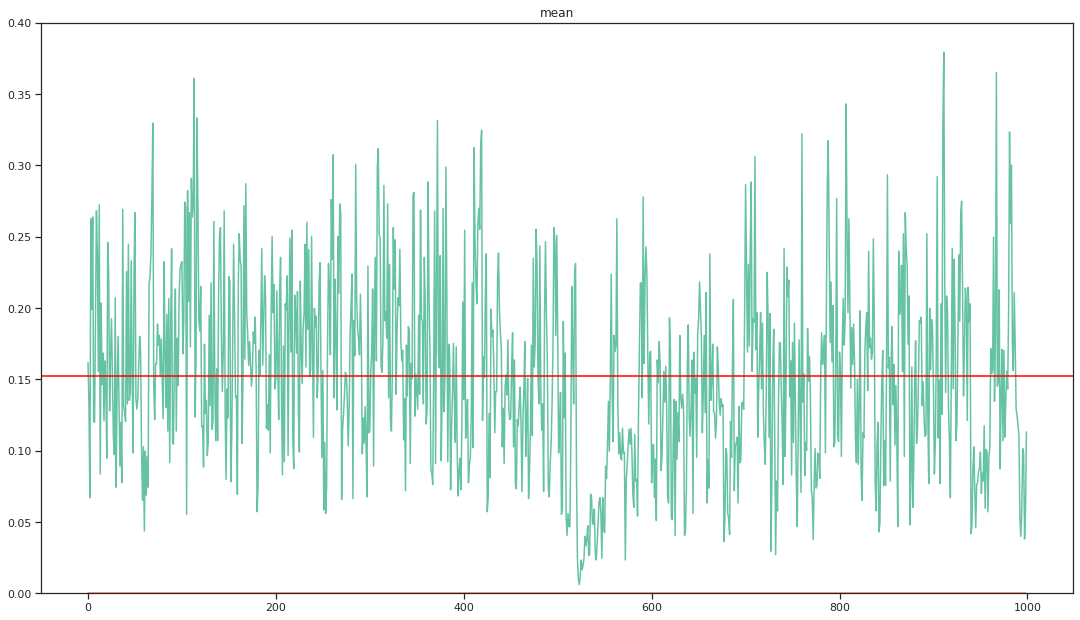

In [ ]:
mean_visual(gt_test)

In [ ]:
print(mean_lst)

[0.16164720344191763, 0.13214505224339274, 0.06699446834665028, 0.2624462200368777, 0.19913952059004303, 0.2636754763368162, 0.12046711739397664, 0.11985248924400738, 0.19360786724031961, 0.2679778733866011, 0.2366318377381684, 0.15550092194222495, 0.272280270436386, 0.08358942839582052, 0.2034419176398279, 0.14628149969268592, 0.1684081130915796, 0.1210817455439459, 0.1628764597418562, 0.14382298709280886, 0.09465273509526737, 0.24585125998770743, 0.22433927473878304, 0.12784265519360788, 0.16717885679164105, 0.19237861094038106, 0.1505838967424708, 0.11001843884449908, 0.09711124769514444, 0.2071296865396435, 0.0743700061462815, 0.1432083589428396, 0.1800860479409957, 0.13460356484326982, 0.08912108174554395, 0.11985248924400738, 0.07744314689612784, 0.26920712968653965, 0.1309157959434542, 0.12661339889366932, 0.12046711739397664, 0.22556853103872157, 0.13275968039336203, 0.2446220036877689, 0.1352181929932391, 0.1407498463429625, 0.2329440688383528, 0.1524277811923786, 0.0983405039

In [ ]:
#trying to do variance
def var_visual(file_arr):
  global var_lst
  var_lst = []
  f_het_rate_lst = []
  het_rate = 0
  hom_rate = 0
  count = 0
  d_lst = []
  n_het_rate = 0
  het_rate2 = 0
  hom_rate2 = 0
  n = 0
  i = 0
  i_lst = []
  h_r_lst = []
  f_h_r_lst = []
  is_hom1 = np.array([1, 1])
  is_hom2 = np.array([0, 0])
  is_het1 = np.array([0, 1])
  is_het2 = np.array([1, 0])


  #calc var rate for individual sections
  for i in gt_test[0:]:
    i_lst = i.tolist()
    for n in i_lst:
      if n == [0, 0] or n == [1, 1]:
        h_r_lst.append(0)
        count = count + 1
      if n == [1, 0] or n == [0, 1]:
        h_r_lst.append(1)
        count = count + 1
      if count == int((len(file_arr) / 10)):    #divide into sections of 1000 samples (size might need to change)
        hom_rate = 0
        het_rate = 0
        f_het_rate = 0
        count = 0
        s_var = stat.variance(h_r_lst)
        var_lst.append(s_var)
        h_r_lst = []



  #calc var rate for all data
  f_h_r_lst = []

  for n in gt_test[0:]:
    if (n[:1,] == is_hom1).all() or (n[:1,]  == is_hom2).all():
      f_h_r_lst.append(0)
    if (n[:1,] == is_het1).all() or (n[:1,] == is_het2).all():
      f_h_r_lst.append(1)
  f_var = np.var(f_h_r_lst)

  x2 = range(len(var_lst)) #this value needs to be changed based on the size of the file/size of the sections (may be an easier way to calculate it)
  line = 0
  line = [line for i in x2]
  plt.plot(x2, var_lst)
  plt.plot(x2, line)
  plt.axhline(y=f_var, color='r', linestyle='-')
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  plt.title('variance')
  plt.show()


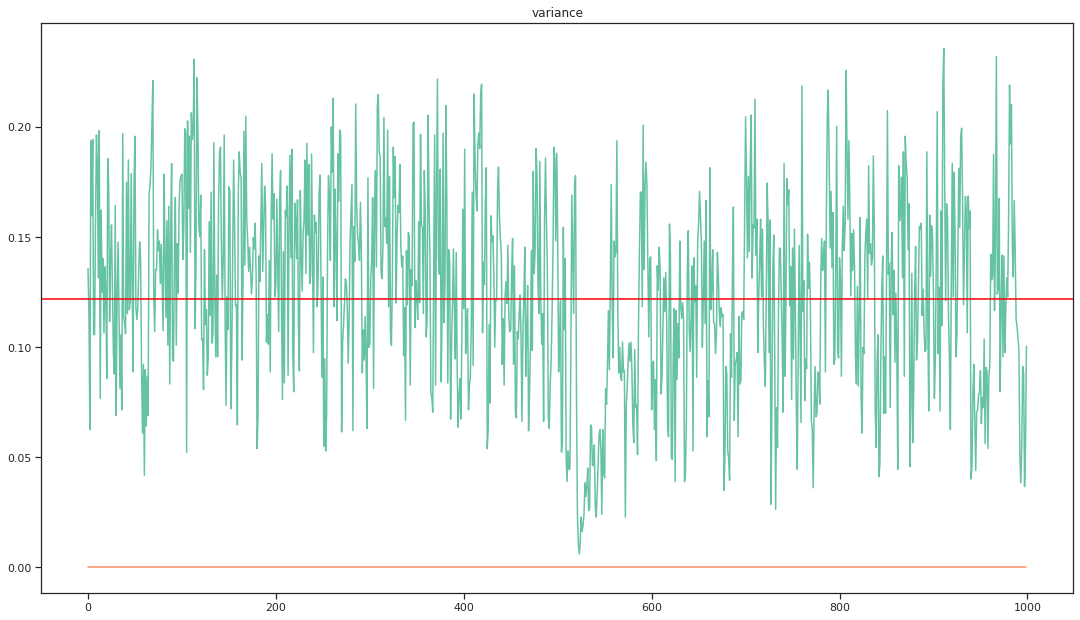

In [ ]:
var_visual(gt_test)

In [ ]:
print(var_lst)

[0.1356007290865779, 0.1147532679997974, 0.06254465126089491, 0.19368724725968833, 0.15958105493777738, 0.1942701234019101, 0.10601995386886875, 0.10555274575486996, 0.15621987811765026, 0.19628637589387568, 0.1807483041025862, 0.13140114806188014, 0.19826558437680256, 0.0766493467024406, 0.1621529675653241, 0.12496002649024647, 0.14013295019243988, 0.10648640598268305, 0.1364315732893039, 0.12321366606413453, 0.08574629692209644, 0.18552244526747666, 0.17411818248483651, 0.11156748322246593, 0.13931571399303422, 0.15546463393337065, 0.1279870512288405, 0.09797459990580236, 0.08773457740723689, 0.16432798009602714, 0.06888144480707252, 0.12277518595714537, 0.1477458720499928, 0.1165570844399286, 0.08122843981973932, 0.10555274575486996, 0.07148964544347348, 0.1968556440327771, 0.11384682377862503, 0.11065045499871104, 0.10601995386886875, 0.17479480264993186, 0.11520535611010688, 0.184895721114556, 0.11700614854950024, 0.12101370552734414, 0.17879101962500876, 0.1292730075426138, 0.088

In [ ]:
#trying to do kurtosis
def kurt_visual(file_arr):
  global kurt_lst
  kurt_lst = []
  f_het_rate_lst = []
  het_rate = 0
  hom_rate = 0
  count = 0
  i_lst = []
  d_lst = []
  n_het_rate = 0
  het_rate2 = 0
  hom_rate2 = 0
  h_r_lst = []
  n = 0
  i = 0
  j = 0
  f_h_r_lst = []
  is_hom1 = np.array([1, 1])
  is_hom2 = np.array([0,0])
  is_het1 = np.array([0, 1])
  is_het2 = np.array([1,0])


  #calc kurt rate for individual sections
  for i in gt_test[0:]:
    i_lst = i.tolist()
    for n in i_lst:
      if n == [0, 0] or n == [1, 1]:
        h_r_lst.append(0)
        count = count + 1
      if n == [1, 0] or n == [0, 1]:
        h_r_lst.append(1)
        count = count + 1
      if count == int((len(file_arr) / 10)):    #divide into sections of 1000 samples (size might need to change)
        s_kurt = kurtosis(h_r_lst)
        kurt_lst.append(s_kurt)
        count = 0
        s_kurt = 0
        h_r_lst = []


  #calc kurt rate for all data
  f_h_r_lst = []

  for n in gt_test[0:]:
    if (n[:1,] == is_hom1).all() or (n[:1,]  == is_hom2).all():
      f_h_r_lst.append(0)
    if (n[:1,] == is_het1).all() or (n[:1,] == is_het2).all():
      f_h_r_lst.append(1)
  f_kurt = kurtosis(f_h_r_lst)


  x3 = range(len(kurt_lst)) #this value needs to be changed based on the size of the file/size of the sections (may be an easier way to calculate it)
  line2 = 0
  line2 = [line2 for i in x3]
  plt.plot(x3, kurt_lst)
  plt.plot(x3, line2)
  plt.axhline(y=f_kurt, color='r', linestyle='-')
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  plt.title('kurtosis')
  plt.show()

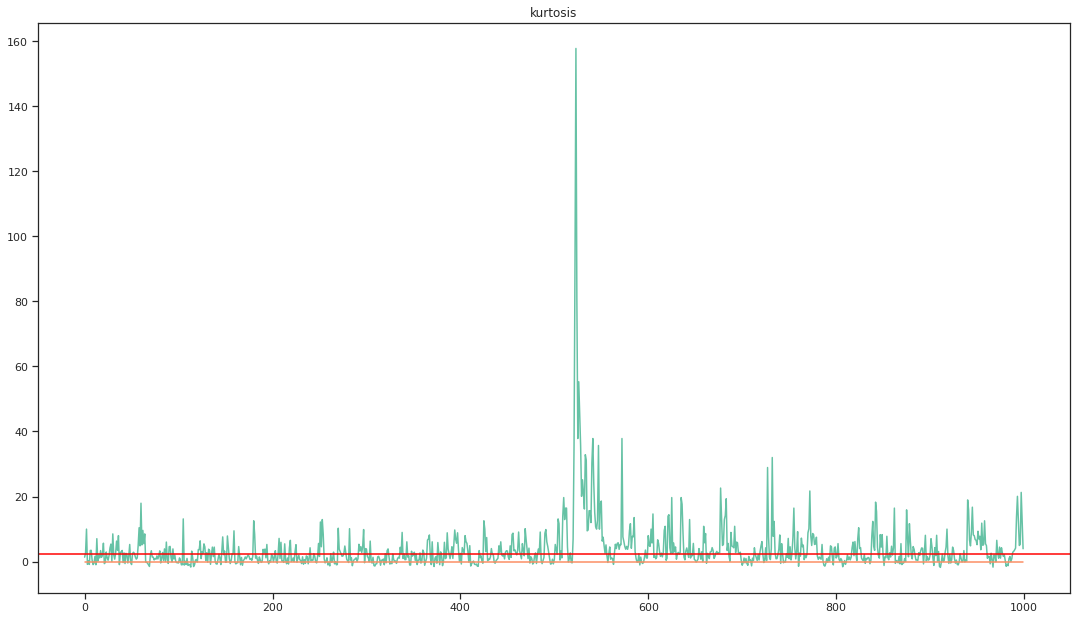

In [ ]:
kurt_visual(gt_test)

In [ ]:
print(kurt_lst)

[1.3791270363391082, 2.719708149416955, 9.99841051117477, -0.8338622170179537, 0.27026188378196503, -0.8493623794124621, 3.437987563998348, 3.479762927947288, 0.4051708284939983, -0.9022696985803305, -0.46404207708555534, 1.614963955100654, -0.953158364346288, 7.054449244486527, 0.17080908955279694, 2.0074807460781283, 1.140469138599813, 3.3966454864932016, 1.3341894550189775, 2.1209742239893004, 5.669483605328816, -0.60650162999185, -0.2532422985910605, 2.9686974846858547, 1.1823556544388962, 0.43628702447469125, 1.8180956318851695, 4.213004259390723, 5.405024515083888, 0.08913348515170494, 8.526626277260108, 2.1499775247689348, 0.7725412038008304, 2.5847635170195087, 6.318530410907902, 3.4797629279472853, 7.9966424500068705, -0.9170113406377345, 2.789134144802813, 3.0430265845876336, 3.4379875639983473, -0.2754876519181697, 2.685490327322359, -0.5882197807589602, 2.551815597337985, 2.2686089297874075, -0.40343811311819255, 1.7403243350721684, 5.277816121336059, -0.28650887522878676, 

In [ ]:
#trying to do skewness
def skew_visual(file_arr):
  global skew_lst
  f_het_rate_lst = []
  het_rate = 0
  hom_rate = 0
  count = 0
  d_lst = []
  skew_lst = []
  sample_lst = []
  h_r_lst = []
  n_het_rate = 0
  het_rate2 = 0
  hom_rate2 = 0
  n = 0
  i_lst = []
  i = 0
  is_hom1 = np.array([1, 1])
  is_hom2 = np.array([0,0])
  is_het1 = np.array([0, 1])
  is_het2 = np.array([1,0])



  #calc skew rate for individual sections
  for i in gt_test[0:]:
    i_lst = i.tolist()
    for n in i_lst:
      if n == [0, 0] or n == [1, 1]:
        h_r_lst.append(0)
        count = count + 1
      if n == [1, 0] or n == [0, 1]:
        h_r_lst.append(1)
        count = count + 1
      if count == int((len(file_arr) / 10)):    #divide into sections of 1000 samples (size might need to change)
        s_skew = skew(h_r_lst)
        skew_lst.append(s_skew)
        count = 0
        s_skew = 0
        h_r_lst = []

  #calc skew for all data
  f_h_r_lst = []

  for n in gt_test[0:]:
    if (n[:1,] == is_hom1).all() or (n[:1,]  == is_hom2).all():
      f_h_r_lst.append(0)
    if (n[:1,] == is_het1).all() or (n[:1,] == is_het2).all():
      f_h_r_lst.append(1)
  f_skew = skew(f_h_r_lst)

  x2 = range(len(skew_lst))
  line = 0 
  line = [line for i in x2]
  plt.plot(x2, skew_lst)
  plt.plot(x2, line)
  plt.axhline(y=f_skew, color='r', linestyle='-')
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  plt.title('skewness')
  plt.show()

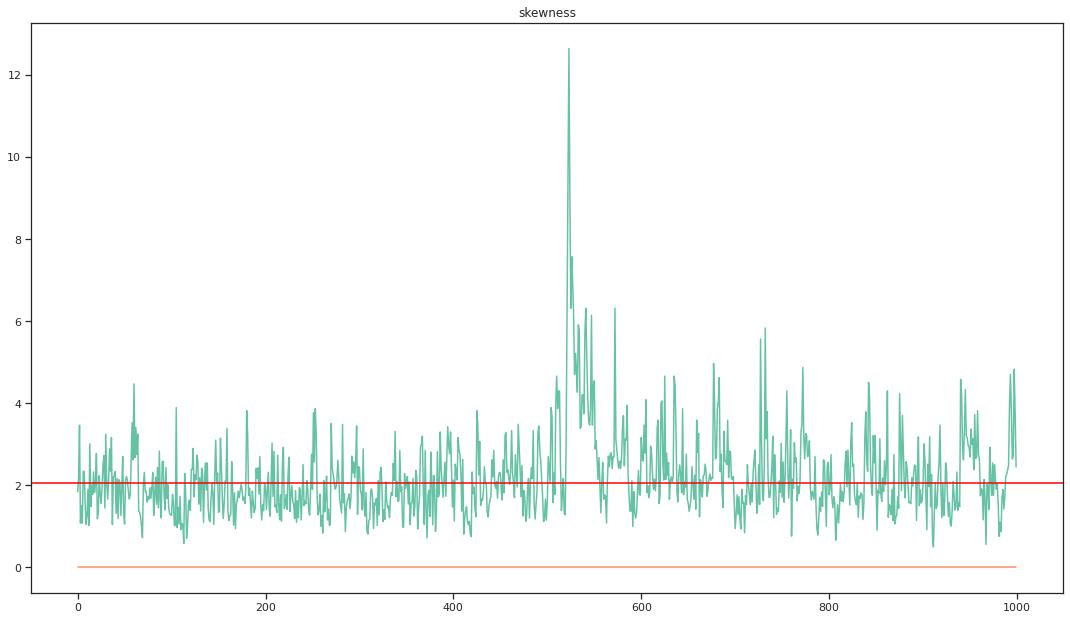

In [ ]:
skew_visual(gt_test)

In [ ]:
print(skew_lst)

[1.8382402009365124, 2.17248892964198, 3.4638721845897784, 1.0798785964088955, 1.5067388240109716, 1.072677780411032, 2.3319493056235916, 2.340889345515351, 1.5508613182660786, 1.0477262530927003, 1.2393376952689061, 1.9013058552217874, 1.0231527919395575, 3.009061189887391, 1.4733665835605192, 2.001869312936819, 1.7721368848370078, 2.323068119210714, 1.8259763018777042, 2.0300182816884433, 2.7693832536015695, 1.1804653192737813, 1.3216496137058944, 2.229057532834416, 1.7839158204463847, 1.5608609881968003, 1.953994788090585, 2.492589869872443, 2.7212174692743476, 1.4453835079838515, 3.2444762716438693, 2.037149362410359, 1.6650949533887933, 2.1412060893383216, 2.884186264946822, 2.3408893455153508, 3.161746740333083, 1.0406674105410747, 2.1884090442151836, 2.2456684048602615, 2.331949305623591, 1.3132068946216473, 2.164599345680941, 1.1881835797725193, 2.1334984409035744, 2.0660612115296604, 1.2635512996636926, 1.9339918136000904, 2.69774278264924, 1.3090038673629705, 1.05481595270431

SVM Model

In [ ]:
mean_arr = np.array(mean_lst)
mean_arr = mean_arr.reshape(-1, 1)
clf = OneClassSVM(gamma='auto').fit(mean_arr)
pred = clf.predict(mean_arr) 
nu = stat.mean(mean_lst)
model = OneClassSVM(kernel = 'rbf',nu = 0.20).fit(mean_arr)

In [ ]:
# a value of '-1' reflect a predicted outlier. 
y_pred = model.predict(mean_arr)

In [ ]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index

(array([  3,   4,   5,   6,   7,   9,  12,  14,  16,  17,  24,  35,  37,
         40,  50,  56,  60,  68,  69,  71,  80,  82,  92, 101, 103, 104,
        106, 107, 108, 110, 111, 112, 113, 114, 116, 117, 133, 144, 145,
        149, 166, 168, 169, 193, 195, 197, 203, 210, 211, 216, 221, 222,
        230, 241, 258, 259, 261, 268, 269, 272, 280, 284, 285, 289, 293,
        302, 305, 308, 309, 315, 317, 319, 322, 331, 346, 347, 348, 354,
        359, 360, 362, 369, 372, 378, 381, 385, 398, 399, 403, 408, 411,
        414, 416, 418, 419, 420, 429, 438, 449, 450, 457, 463, 467, 507,
        508, 509, 510, 512, 513, 521, 522, 523, 524, 525, 526, 527, 528,
        529, 530, 531, 532, 533, 534, 537, 538, 540, 541, 542, 543, 547,
        549, 550, 561, 563, 572, 585, 586, 591, 597, 598, 599, 605, 612,
        621, 622, 625, 635, 636, 640, 645, 652, 669, 673, 677, 678, 682,
        683, 684, 699, 700, 702, 706, 710, 712, 715, 716, 719, 726, 727,
        732, 755, 758, 760, 772, 783, 786, 787, 788

In [ ]:
#returns regions where 3 straight outliers are predicted. Should return areas in the mid to late 80s.
for i in range(len(y_pred)-4):
  
    # checking the conditions
    if y_pred[i] == y_pred[i + 1] and y_pred[i + 1] == y_pred[i + 2] and y_pred[i + 2] == y_pred[i + 3] and y_pred[i + 3] == y_pred[i + 4] and y_pred[i] == -1:
  
        # printing the element as the 
        # conditions are satisfied 
        print(i, i+1, i+2, i+3, i+4)

    else:
      y_pred[i] = 1

3 4 5 6 7
110 111 112 113 114
521 522 523 524 525
522 523 524 525 526
523 524 525 526 527
524 525 526 527 528
525 526 527 528 529
526 527 528 529 530
527 528 529 530 531
528 529 530 531 532
529 530 531 532 533
530 531 532 533 534


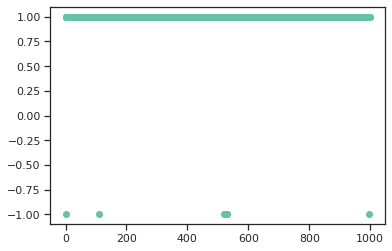

In [ ]:
x = range(len(y_pred))
plt.scatter(x, y_pred)
plt.show()

In [ ]:
var_arr = np.array(var_lst)
var_arr = var_arr.reshape(-1, 1)
clf = OneClassSVM(gamma='auto').fit(var_arr)
pred = clf.predict(var_arr) 
nu = stat.mean(var_lst)
model = OneClassSVM(kernel = 'rbf',nu = 0.20).fit(var_arr)
# a value of '-1' reflect a predicted outlier. 
y_pred = model.predict(var_arr)

In [ ]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index

(array([  9,  12,  32,  37,  45,  55,  60,  68,  69,  76,  88,  90,  91,
         95, 103, 104, 105, 106, 110, 112, 113, 116, 117, 119, 128, 136,
        138, 142, 143, 145, 157, 158, 164, 166, 168, 170, 176, 206, 229,
        234, 242, 244, 252, 253, 259, 261, 262, 268, 269, 273, 277, 279,
        285, 287, 294, 296, 308, 309, 315, 318, 319, 320, 328, 329, 336,
        340, 341, 342, 346, 347, 353, 354, 362, 369, 372, 377, 378, 381,
        388, 391, 411, 416, 418, 419, 430, 431, 434, 435, 439, 446, 452,
        493, 498, 500, 503, 504, 509, 510, 511, 512, 513, 514, 521, 522,
        523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 537,
        538, 540, 541, 542, 543, 547, 549, 550, 558, 559, 560, 572, 575,
        577, 585, 590, 591, 602, 605, 621, 622, 625, 629, 630, 631, 633,
        635, 636, 644, 646, 649, 653, 655, 656, 677, 678, 681, 682, 683,
        689, 690, 700, 706, 710, 720, 727, 730, 732, 743, 747, 751, 755,
        760, 764, 766, 769, 772, 781, 784, 787, 788

In [ ]:
#returns regions where 3 straight outliers are predicted. Should return areas in the mid to late 80s.
for i in range(len(y_pred)-4):
  
    # checking the conditions
    if y_pred[i] == y_pred[i + 1] and y_pred[i + 1] == y_pred[i + 2] and y_pred[i + 2] == y_pred[i + 3] and y_pred[i + 3] == y_pred[i + 4] and y_pred[i] == -1:
  
        # printing the element as the 
        # conditions are satisfied 
        print(i, i+1, i+2, i+3, i+4)

    else:
      y_pred[i] = 1

509 510 511 512 513
510 511 512 513 514
521 522 523 524 525
522 523 524 525 526
523 524 525 526 527
524 525 526 527 528
525 526 527 528 529
526 527 528 529 530
527 528 529 530 531
528 529 530 531 532
529 530 531 532 533
530 531 532 533 534


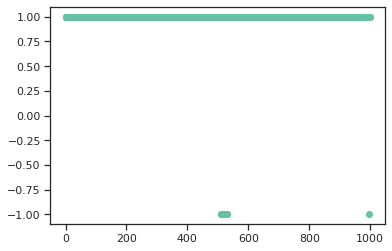

In [ ]:
x = range(len(y_pred))
plt.scatter(x, y_pred)
plt.show()

In [ ]:
kurt_arr = np.array(kurt_lst)
kurt_arr = kurt_arr.reshape(-1, 1)
clf = OneClassSVM(gamma='auto').fit(kurt_arr)
pred = clf.predict(kurt_arr) 
nu = stat.mean(kurt_lst)
model = OneClassSVM(kernel = 'rbf',nu = 0.20).fit(kurt_arr)
# a value of '-1' reflect a predicted outlier. 
y_pred = model.predict(kurt_arr)

In [ ]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index

(array([  2,   3,   5,   9,  12,  30,  37,  50,  58,  60,  62,  64,  68,
         69, 103, 104, 105, 106, 108, 110, 111, 112, 113, 116, 117, 134,
        140, 141, 145, 159, 161, 166, 168, 180, 181, 196, 217, 233, 238,
        251, 253, 254, 259, 261, 266, 268, 269, 270, 282, 285, 297, 308,
        309, 310, 315, 319, 325, 338, 346, 347, 354, 362, 369, 372, 378,
        381, 386, 394, 397, 401, 411, 415, 416, 417, 418, 419, 425, 426,
        456, 462, 469, 477, 485, 490, 491, 496, 499, 504, 505, 509, 510,
        511, 512, 513, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
        531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
        544, 545, 546, 547, 548, 549, 550, 563, 572, 580, 581, 585, 591,
        603, 605, 617, 618, 621, 622, 625, 635, 636, 637, 644, 659, 661,
        677, 678, 681, 682, 683, 688, 692, 700, 706, 710, 727, 732, 734,
        755, 759, 760, 770, 771, 772, 775, 787, 788, 797, 807, 808, 810,
        824, 839, 842, 843, 851, 862, 868, 870, 875

In [ ]:
#returns regions where 3 straight outliers are predicted. Should return areas in the mid to late 80s.
for i in range(len(y_pred)-4):
  
    # checking the conditions
    if y_pred[i] == y_pred[i + 1] and y_pred[i + 1] == y_pred[i + 2] and y_pred[i + 2] == y_pred[i + 3] and y_pred[i + 3] == y_pred[i + 4] and y_pred[i] == -1:
  
        # printing the element as the 
        # conditions are satisfied 
        print(i, i+1, i+2, i+3, i+4)

    else:
      y_pred[i] = 1

415 416 417 418 419
509 510 511 512 513
521 522 523 524 525
522 523 524 525 526
523 524 525 526 527
524 525 526 527 528
525 526 527 528 529
526 527 528 529 530
527 528 529 530 531
528 529 530 531 532
529 530 531 532 533
530 531 532 533 534
531 532 533 534 535
532 533 534 535 536
533 534 535 536 537
534 535 536 537 538
535 536 537 538 539
536 537 538 539 540
537 538 539 540 541
538 539 540 541 542
539 540 541 542 543
540 541 542 543 544
541 542 543 544 545
542 543 544 545 546
543 544 545 546 547
544 545 546 547 548
545 546 547 548 549
546 547 548 549 550


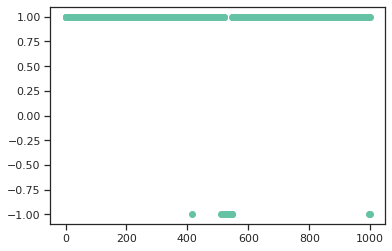

In [ ]:
x = range(len(y_pred))
plt.scatter(x, y_pred)
plt.show()

In [ ]:
skew_arr = np.array(skew_lst)
skew_arr = skew_arr.reshape(-1, 1)
clf = OneClassSVM(gamma='auto').fit(skew_arr)
pred = clf.predict(skew_arr) 
model = OneClassSVM(kernel = 'rbf',nu = 0.20).fit(skew_arr)
# a value of '-1' reflect a predicted outlier. 
y_pred = model.predict(skew_arr)

In [ ]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index

(array([  1,   5,   9,  12,  13,  23,  34,  37,  38,  42,  50,  52,  60,
         68,  69,  83, 103, 104, 105, 106, 108, 110, 111, 112, 113, 116,
        117, 123, 130, 145, 146, 166, 168, 180, 191, 207, 219, 251, 253,
        259, 261, 265, 268, 269, 278, 285, 295, 304, 308, 309, 315, 319,
        346, 347, 351, 354, 357, 361, 362, 365, 366, 369, 372, 378, 379,
        381, 395, 406, 411, 416, 418, 419, 425, 442, 448, 459, 470, 480,
        484, 494, 504, 505, 509, 510, 511, 512, 513, 517, 520, 521, 522,
        523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 537,
        538, 539, 540, 541, 542, 543, 544, 546, 547, 549, 550, 551, 572,
        574, 581, 585, 591, 605, 610, 616, 618, 621, 622, 625, 632, 634,
        635, 636, 642, 644, 659, 666, 675, 676, 677, 678, 681, 682, 683,
        692, 693, 698, 700, 706, 710, 721, 727, 732, 734, 735, 749, 755,
        760, 763, 772, 787, 788, 797, 807, 820, 821, 823, 839, 842, 843,
        851, 857, 862, 870, 875, 878, 879, 888, 901

In [ ]:
#returns regions where 3 straight outliers are predicted. Should return areas in the mid to late 80s.
for i in range(len(y_pred)-4):
  
    # checking the conditions
    if y_pred[i] == y_pred[i + 1] and y_pred[i + 1] == y_pred[i + 2] and y_pred[i + 2] == y_pred[i + 3] and y_pred[i + 3] == y_pred[i + 4] and y_pred[i] == -1:
  
        # printing the element as the 
        # conditions are satisfied 
        print(i, i+1, i+2, i+3, i+4)

    else:
      y_pred[i] = 1

509 510 511 512 513
520 521 522 523 524
521 522 523 524 525
522 523 524 525 526
523 524 525 526 527
524 525 526 527 528
525 526 527 528 529
526 527 528 529 530
527 528 529 530 531
528 529 530 531 532
529 530 531 532 533
530 531 532 533 534
537 538 539 540 541
538 539 540 541 542
539 540 541 542 543
540 541 542 543 544


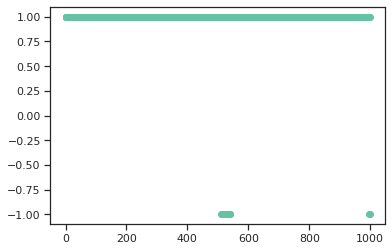

In [ ]:
x = range(len(y_pred))
plt.scatter(x, y_pred)
plt.show()

Isolation Forest Model

In [ ]:
mean_arr = np.array(mean_lst)
mean_arr = mean_arr.reshape(-1, 1)
n = int(len(mean_arr) / 10)
model=IsolationForest(n_estimators= n , max_samples='auto', contamination=float(0.10),max_features=1.0)
model.fit(mean_arr)
len(mean_arr)

1000

In [ ]:
anomaly_score = model.decision_function(mean_arr)
anomaly_decision = model.predict(mean_arr)

In [ ]:
# filter outlier index
outlier_index_mean = where(anomaly_decision == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index_mean

(array([ 12,  60,  68,  69, 103, 104, 106, 110, 112, 113, 116, 117, 166,
        168, 259, 261, 268, 285, 308, 309, 315, 319, 346, 347, 362, 372,
        378, 381, 411, 416, 418, 419, 509, 510, 512, 513, 521, 522, 523,
        524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 537, 538,
        540, 541, 542, 543, 547, 549, 550, 572, 591, 605, 621, 622, 625,
        635, 636, 677, 678, 682, 683, 700, 706, 710, 727, 732, 755, 760,
        772, 787, 788, 797, 807, 842, 843, 851, 862, 875, 904, 910, 911,
        930, 940, 941, 945, 967, 981, 983, 993, 997]),)

In [ ]:
#returns regions where 3 straight outliers are predicted. Should return areas in the mid to late 80s.
for i in range(len(anomaly_decision)-4):
  
    # checking the conditions
    if anomaly_decision[i] == anomaly_decision[i + 1] and anomaly_decision[i + 1] == anomaly_decision[i + 2] and  anomaly_decision[i + 2] == anomaly_decision[i + 3] and anomaly_decision[i + 3] == anomaly_decision[i + 4] and anomaly_decision[i] == -1:
  
        # printing the element as the 
        # conditions are satisfied 
        print('Anomalous regions found: ',i, i+1, i+2, i+3, i+4)
    else:
      anomaly_decision[i] = 1

Anomalous regions found:  521 522 523 524 525
Anomalous regions found:  522 523 524 525 526
Anomalous regions found:  523 524 525 526 527
Anomalous regions found:  524 525 526 527 528
Anomalous regions found:  525 526 527 528 529
Anomalous regions found:  526 527 528 529 530
Anomalous regions found:  527 528 529 530 531
Anomalous regions found:  528 529 530 531 532
Anomalous regions found:  529 530 531 532 533
Anomalous regions found:  530 531 532 533 534


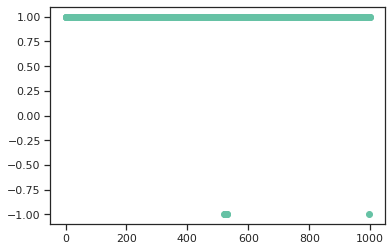

In [ ]:
x = range(len(anomaly_decision))
plt.scatter(x, anomaly_decision)
plt.show()

USING VAR:


In [ ]:
var_arr = np.array(var_lst)
var_arr = var_arr.reshape(-1, 1)
n = int(len(var_arr) / 10)
model=IsolationForest(n_estimators= n , max_samples='auto', contamination=float(0.10),max_features=1.0)
model.fit(var_arr)
len(var_arr)

1000

In [ ]:
anomaly_score = model.decision_function(var_arr)
anomaly_decision = model.predict(var_arr)

In [ ]:
outlier_index_var = where(anomaly_decision == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index_var

(array([ 60,  68,  69, 103, 106, 110, 113, 116, 168, 259, 261, 285, 308,
        309, 315, 346, 347, 362, 372, 381, 411, 418, 419, 505, 509, 510,
        512, 513, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531,
        532, 533, 534, 537, 538, 540, 541, 542, 543, 547, 549, 550, 572,
        581, 585, 591, 605, 618, 621, 622, 625, 635, 636, 659, 677, 678,
        682, 683, 692, 700, 706, 710, 727, 732, 755, 760, 772, 787, 788,
        797, 807, 842, 843, 851, 862, 875, 878, 904, 910, 911, 930, 940,
        941, 945, 955, 967, 981, 983, 992, 993, 997]),)

In [ ]:
#returns regions where 5 straight outliers are predicted. Should return areas in the mid to late 80s.
for i in range(len(anomaly_decision)-4):
  
    # checking the conditions
    if anomaly_decision[i] == anomaly_decision[i + 1] and anomaly_decision[i + 1] == anomaly_decision[i + 2] and  anomaly_decision[i + 2] == anomaly_decision[i + 3] and anomaly_decision[i + 3] == anomaly_decision[i + 4] and anomaly_decision[i] == -1:
  
        # printing the element as the 
        # conditions are satisfied 
        print('Anomalous regions found: ',i, i+1, i+2, i+3, i+4)
    else:
      anomaly_decision[i] = 1

Anomalous regions found:  521 522 523 524 525
Anomalous regions found:  522 523 524 525 526
Anomalous regions found:  523 524 525 526 527
Anomalous regions found:  524 525 526 527 528
Anomalous regions found:  525 526 527 528 529
Anomalous regions found:  526 527 528 529 530
Anomalous regions found:  527 528 529 530 531
Anomalous regions found:  528 529 530 531 532
Anomalous regions found:  529 530 531 532 533
Anomalous regions found:  530 531 532 533 534


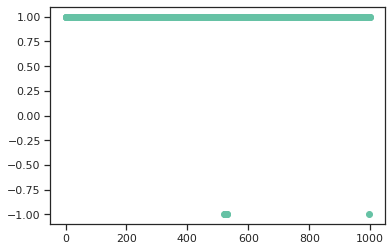

In [ ]:
x = range(len(anomaly_decision))
plt.scatter(x, anomaly_decision)
plt.show()

USING KURTOSIS


In [ ]:
kurt_arr = np.array(kurt_lst)
kurt_arr = kurt_arr.reshape(-1, 1)
n = int(len(kurt_arr) / 10)
model=IsolationForest(n_estimators= n , max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(kurt_arr)
len(kurt_arr)

1000

In [ ]:
anomaly_score = model.decision_function(kurt_arr)
anomaly_decision = model.predict(kurt_arr)

In [ ]:
# filter outlier index
outlier_index_kurt = where(anomaly_decision == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index_kurt

(array([ 58,  60,  69, 105, 113, 116, 180, 251, 253, 261, 309, 372, 394,
        411, 418, 419, 425, 504, 505, 509, 510, 511, 512, 513, 521, 522,
        523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 536,
        537, 538, 539, 540, 541, 542, 543, 544, 546, 547, 549, 550, 572,
        581, 585, 605, 618, 621, 622, 625, 635, 636, 644, 659, 677, 678,
        681, 682, 683, 692, 710, 727, 732, 734, 755, 760, 772, 788, 807,
        824, 839, 842, 843, 862, 875, 878, 910, 911, 940, 941, 945, 955,
        958, 967, 981, 992, 993, 994, 997, 998]),)

In [ ]:
#returns regions where 5 straight outliers are predicted. Should return areas in the mid to late 80s.
for i in range(len(anomaly_decision)-4):
  
    # checking the conditions
    if anomaly_decision[i] == anomaly_decision[i + 1] and anomaly_decision[i + 1] == anomaly_decision[i + 2] and  anomaly_decision[i + 2] == anomaly_decision[i + 3] and anomaly_decision[i + 3] == anomaly_decision[i + 4] and anomaly_decision[i] == -1:
  
        # printing the element as the 
        # conditions are satisfied 
        print('Anomalous regions found: ',i, i+1, i+2, i+3, i+4)
    else:
      anomaly_decision[i] = 1

Anomalous regions found:  509 510 511 512 513
Anomalous regions found:  521 522 523 524 525
Anomalous regions found:  522 523 524 525 526
Anomalous regions found:  523 524 525 526 527
Anomalous regions found:  524 525 526 527 528
Anomalous regions found:  525 526 527 528 529
Anomalous regions found:  526 527 528 529 530
Anomalous regions found:  527 528 529 530 531
Anomalous regions found:  528 529 530 531 532
Anomalous regions found:  529 530 531 532 533
Anomalous regions found:  530 531 532 533 534
Anomalous regions found:  536 537 538 539 540
Anomalous regions found:  537 538 539 540 541
Anomalous regions found:  538 539 540 541 542
Anomalous regions found:  539 540 541 542 543
Anomalous regions found:  540 541 542 543 544


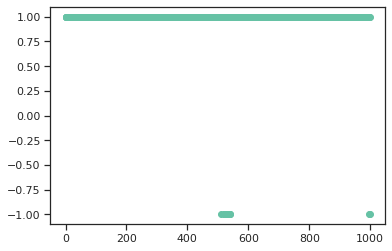

In [ ]:
x = range(len(anomaly_decision))
plt.scatter(x, anomaly_decision)
plt.show()

USING SKEWNESS

In [ ]:
skew_arr = np.array(skew_lst)
skew_arr = skew_arr.reshape(-1, 1)
n = int(len(skew_arr) / 10)
model=IsolationForest(n_estimators= n , max_samples='auto', contamination=float(0.10),max_features=1.0)
model.fit(skew_arr)
len(skew_arr)

1000

In [ ]:
anomaly_score = model.decision_function(skew_arr)
anomaly_decision = model.predict(skew_arr)

In [ ]:
# filter outlier index
outlier_index_skew = where(anomaly_decision == -1) 
# these are values where an outlier was predicted. An anomalous region should be where multiple outliers are near each other.
outlier_index_skew

(array([ 60,  69, 105, 110, 113, 116, 180, 253, 261, 285, 308, 309, 372,
        381, 411, 418, 419, 425, 504, 505, 509, 510, 511, 512, 513, 521,
        522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534,
        537, 538, 539, 540, 541, 542, 543, 546, 547, 549, 550, 572, 581,
        585, 605, 618, 621, 622, 625, 635, 636, 644, 659, 677, 678, 681,
        682, 683, 692, 710, 727, 732, 734, 755, 760, 772, 788, 807, 839,
        842, 843, 851, 862, 875, 878, 904, 910, 911, 940, 941, 945, 955,
        958, 967, 981, 983, 992, 993, 994, 997]),)

In [ ]:
#returns regions where 5 straight outliers are predicted. Should return areas in the mid to late 80s.
for i in range(len(anomaly_decision)-4):
  
    # checking the conditions
    if anomaly_decision[i] == anomaly_decision[i + 1] and anomaly_decision[i + 1] == anomaly_decision[i + 2] and  anomaly_decision[i + 2] == anomaly_decision[i + 3] and anomaly_decision[i + 3] == anomaly_decision[i + 4] and anomaly_decision[i] == -1:
  
        # printing the element as the 
        # conditions are satisfied 
        print('Anomalous regions found: ',i, i+1, i+2, i+3, i+4)
    else:
      anomaly_decision[i] = 1

Anomalous regions found:  509 510 511 512 513
Anomalous regions found:  521 522 523 524 525
Anomalous regions found:  522 523 524 525 526
Anomalous regions found:  523 524 525 526 527
Anomalous regions found:  524 525 526 527 528
Anomalous regions found:  525 526 527 528 529
Anomalous regions found:  526 527 528 529 530
Anomalous regions found:  527 528 529 530 531
Anomalous regions found:  528 529 530 531 532
Anomalous regions found:  529 530 531 532 533
Anomalous regions found:  530 531 532 533 534
Anomalous regions found:  537 538 539 540 541
Anomalous regions found:  538 539 540 541 542
Anomalous regions found:  539 540 541 542 543


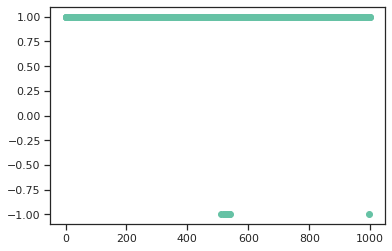

In [ ]:
x = range(len(anomaly_decision))
plt.scatter(x, anomaly_decision)
plt.show()

Using each model to identify most clear anomalies

In [ ]:
#find regions which each statistic show an anomaly
skew_kurt_intersect = np.intersect1d(outlier_index_kurt, outlier_index_skew)
mean_var_intersect = np.intersect1d(outlier_index_kurt, outlier_index_skew)
intersect_anom = np.intersect1d(mean_var_intersect, skew_kurt_intersect)
print(intersect_anom)

[ 60  69 105 113 116 180 253 261 309 372 411 418 419 425 504 505 509 510
 511 512 513 521 522 523 524 525 526 527 528 529 530 531 532 533 534 537
 538 539 540 541 542 543 546 547 549 550 572 581 585 605 618 621 622 625
 635 636 644 659 677 678 681 682 683 692 710 727 732 734 755 760 772 788
 807 839 842 843 862 875 878 910 911 940 941 945 955 958 967 981 992 993
 994 997]


In [ ]:
intersect_lst = intersect_anom.tolist()

In [ ]:
for i in range(len(intersect_lst)-5):
  if intersect_lst[i] - intersect_lst[i+4] == -5:
    print('These are the regions where every summary statistic identified an anomaly (at least 4 in a row):\n '
    ,intersect_lst[i],intersect_lst[i+1],intersect_lst[i+2],intersect_lst[i+3],intersect_lst[i+4])